# `spheres_from_coords`

In cases where an external package is used to generate a sphere packing, this function can be used to convert the result to an `ndimage`. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import porespy as ps

## `df`

The function is designed to accept the input coordinates and sphere radii as a `pandas` DataFrame, which is why this argument is called `df`...although as we'll see this is somewhat flexible.

Let assume we have 4 spheres whose x, y, and z coordinates plus their respective radii are stored as column an Excel file with each row representing a sphere.  This format can be directly read into a DataFrame using `df = pd.read_excel` or `df = pd.read_csv`, which is why the DataFrame is the format of choice. 

Let's enter a DataFrame by hand for this demonstration, then print it:

In [2]:
df = pd.DataFrame(
    {
        "X": [10, 20, 40, 40],
        "Y": [10, 30, 50, 10],
        "Z": [0, 0, 0, 0],
        "R": [5.0, 8.0, 17.5, 4.0],
    }
)
print(df)

    X   Y  Z     R
0  10  10  0   5.0
1  20  30  0   8.0
2  40  50  0  17.5
3  40  10  0   4.0


This array of spheres is only 2D as can be seen by all the 'Z' values being 0.  The returned image will be in 2D.

In [3]:
im = ps.generators.spheres_from_coords(df)

The function also accepts numpy arrays with the same format as the above DataFrame:

In [4]:
arr = np.array(df)
print(arr)

[[10.  10.   0.   5. ]
 [20.  30.   0.   8. ]
 [40.  50.   0.  17.5]
 [40.  10.   0.   4. ]]


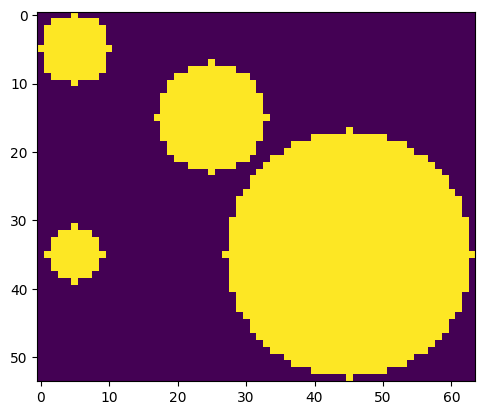

In [5]:
im = ps.generators.spheres_from_coords(arr)
plt.imshow(im);

It is also acceptable to pass a python `dict`:

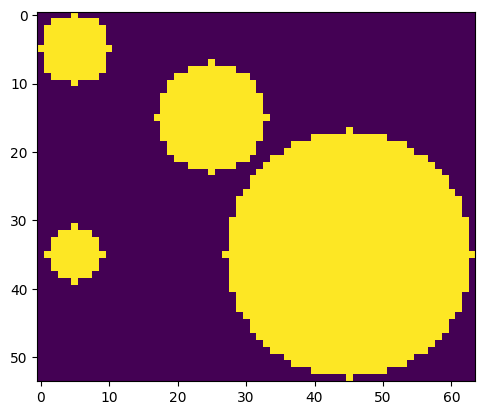

In [6]:
dct = {
    "X": [10, 20, 40, 40],
    "Y": [10, 30, 50, 10],
    "Z": [0, 0, 0, 0],
    "R": [5.0, 8.0, 17.5, 4.0],
}
im = ps.generators.spheres_from_coords(dct)
plt.imshow(im);

It is also acceptable to leave the 'X' or 'Y' columns as 0's.  The function will ignore the column with all 0's and return a 2D image.

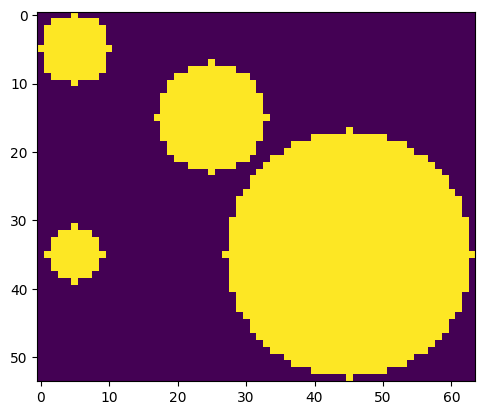

In [7]:
dct = {
    "X": [10, 20, 40, 40],
    "Y": [0, 0, 0, 0],
    "Z": [10, 30, 50, 10],
    "R": [5.0, 8.0, 17.5, 4.0],
}
im = ps.generators.spheres_from_coords(dct)
plt.imshow(im);

Of course, it also works with 3D images:

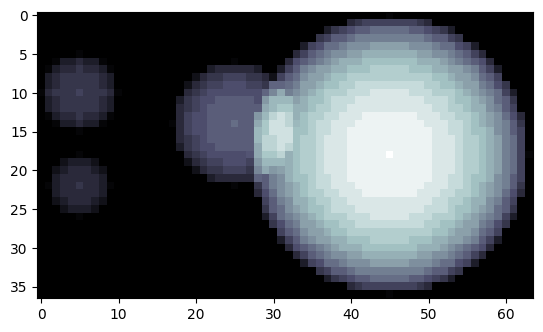

In [13]:
dct = {
    "X": [10, 20, 40, 40],
    "Y": [10, 30, 50, 10],
    "Z": [4, 8, 12, 16],
    "R": [5.0, 8.0, 17.5, 4.0],
}
im = ps.generators.spheres_from_coords(dct)
plt.imshow(ps.visualization.xray(~im, axis=0).T, cmap=plt.cm.bone_r);

## `mode`

The options are `'extended'` which means the spheres are allowed to extend beyond the edge of the image, and ``contained`` meaning the sphere lie fully inside the image.

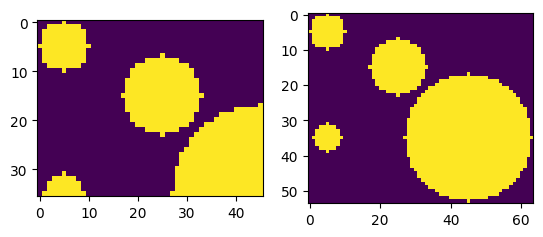

In [9]:
im1 = ps.generators.spheres_from_coords(df, mode="extended")
im2 = ps.generators.spheres_from_coords(df, mode="contained")
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im1)
ax[1].imshow(im2);

## `smooth`
This controls the outer shape of the spheres.  

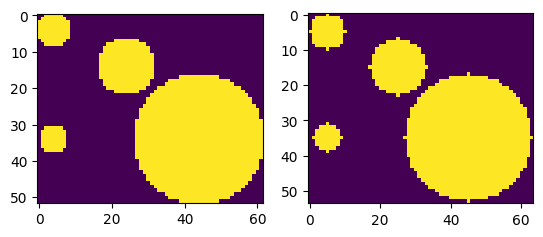

In [10]:
im1 = ps.generators.spheres_from_coords(df, smooth=True)
im2 = ps.generators.spheres_from_coords(df, smooth=False)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(im1)
ax[1].imshow(im2);